# Análise e Transformação de Dados @ DEI-FCTUC
## Introdução à Ficha Prática nº 2 usando MATLAB
### Autoria: Alberto Cardoso ©DEI2021/2022, Fevereiro 2022

Objetivo: Pretende-se adquirir sensibilidade para as questões fundamentais de sinais, em particular para as propriedades de sinais de tempo contínuo e de tempo discreto e para o cálculo da energia *(toolbox em MATLAB: Symbolic Math)*.

### Exercícios:

<strong>Exercício 1.</strong> Pretende-se analisar o sinal de tempo contínuo $x_1(t)=6cos(3t)sin(4t)$ para $t \in [-\pi,\pi]$.

1.1 Determinar as frequências (linear e angular) fundamentais e o período fundamental de $x_1(t)$, tendo em conta a seguinte formulação de Fourier para sinais de tempo contínuo:
$x_1(t)=\sum_{m=0}^{\infty}C_mcos(m\omega_0t+\theta_m)$ .

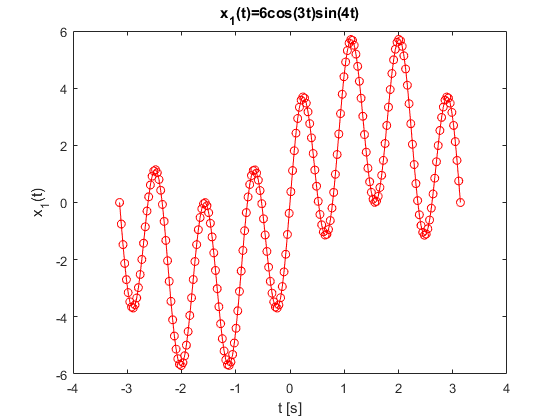

In [16]:
% Representação do sinal x1(t)
t=linspace(-pi,pi,200);
x1=6*cos(3*t).*sin(4*t);
plot(t,x1,'-or')
xlabel('t [s]')
ylabel('x_1(t)')
title('x_1(t)=6cos(3t)sin(4t)')

In [2]:
% x1(t) =  6*cos(3*t)*sin(4*t)
% Considerando as relações trigonométricas, verifica-se que 
% as frequências presentes no sinal são:
% w pertencente a {4+3, 4-3} ou seja {1, 7} rad/s
w = [1,7]

% frequência angular fundamental, w0, em rad/s
w0 = gcd(sym(w))
% frequência linear fundamental, f0, em Hz
f0 = w0/(2*pi)
% período fundamental, T0, em s
T0 = 1/f0

syms t
% expressão simbólica do sinal x1(t)
x1ts=6*cos(3*t)*sin(4*t)
% expressão equivalente de x1(t) conforme formulação de Fourier
x1teqs=3*cos(t-pi/2)+3*cos(7*t-pi/2)


w =

     1     7

 
w0 =
 
1
 
 
f0 =
 
1/(2*pi)
 
 
T0 =
 
2*pi
 
 
x1ts =
 
6*cos(3*t)*sin(4*t)
 
 
x1teqs =
 
3*cos(7*t - pi/2) + 3*cos(t - pi/2)
 



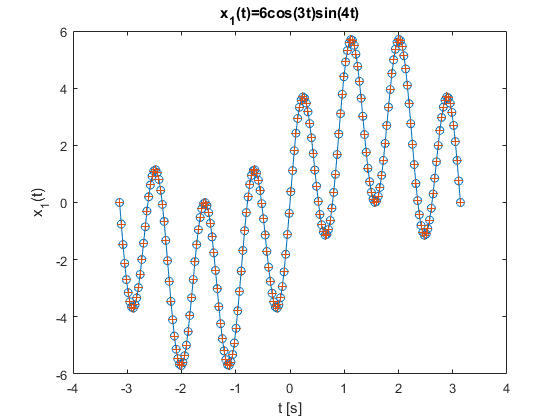

In [3]:
% obtenção e plot de x1 e x1eq

t=linspace(-pi,pi,200);
x1t=double(subs(x1ts));
x1teq=double(subs(x1teqs));

plot(t,x1t,'-o',t,x1teq,'+')
xlabel('t [s]')
ylabel('x_1(t)')
title('x_1(t)=6cos(3t)sin(4t)')

 
x1ts =
 
6*cos(3*t)*sin(4*t)
 



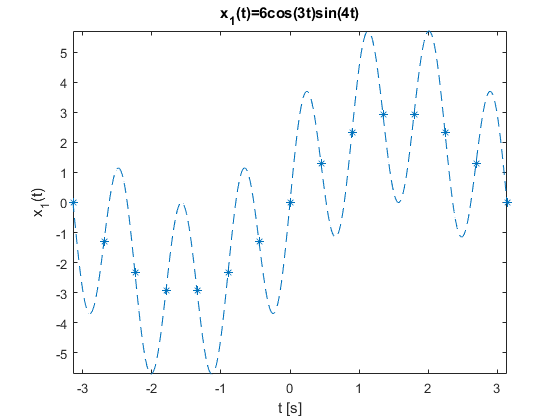

In [4]:
syms t
x1ts=6*cos(3*t)*sin(4*t)
% Plot alternativo usando expressão simbólica de x1(t)
fplot(t,x1ts,[-pi,pi],'--*')
xlabel('t [s]')
ylabel('x_1(t)')
title('x_1(t)=6cos(3t)sin(4t)')

1.2. Verificar a paridade do sinal $x_1(t)$.

In [5]:
syms t  % t=sym('t')
x1ts=6*cos(3*t)*sin(4*t)    % ft=sym('6*cos(3*t)*sin(4*t)')

x1_ts=subs(x1ts,-t)

if x1ts==x1_ts,
    disp('x1(t) é um sinal par')
elseif x1ts == -x1_ts,
    disp('x1(t) é um sinal ímpar')
else
    disp('x1(t) é um sinal nem par nem ímpar')
end

 
x1ts =
 
6*cos(3*t)*sin(4*t)
 
 
x1_ts =
 
-6*cos(3*t)*sin(4*t)
 
x1(t) é um sinal ímpar



1.3. Obter a expressão do sinal de tempo discreto $x_1[n]$ que resulta de $x_1(t)$ usando $t=nT_s$, em que $T_s$ representa o período de amostragem com que o sinal de tempo contínuo $x_1(t)$ é amostrado.

In [6]:
syms t n Ts
x1ts=6*cos(3*t)*sin(4*t)
x1ns=subs(x1ts,n*Ts)

 
x1ts =
 
6*cos(3*t)*sin(4*t)
 
 
x1ns =
 
6*cos(3*Ts*n)*sin(4*Ts*n)
 



1.4. Determinar a frequência angular fundamental e o período fundamental de $x_1[n]$.

In [7]:
% Tendo em conta as frequências angulares presentes no sinal x1(t)
% obtém-se a frequência angular fundamental de x1[n], Omega0, em rad
Omega0s = gcd(sym(w)*Ts)

% período fundamental de x1[n], N
Ns = 2*pi/Omega0s

% expressão equivalente de x1(t) conforme formulação de Fourier
x1neqs=subs(x1teqs,n*Ts)

 
Omega0s =
 
Ts
 
 
Ns =
 
(2*pi)/Ts
 
 
x1neqs =
 
3*cos(pi/2 - Ts*n) + 3*cos(pi/2 - 7*Ts*n)
 

